# Reproduce scVI results

In [1]:
cd ../..

/home/ubuntu/scVI


In [3]:
import os

import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

from scvi.dataset import GeneExpressionDataset, CortexDataset, RetinaDataset, BrainLargeDataset, HematoDataset, CbmcDataset, SyntheticDataset, SyntheticRandomDataset, PbmcDataset, BrainSmallDataset

from scvi.models import VAE

from scvi.inference import UnsupervisedTrainer

### Figure 1c. runtime

In [3]:
# load dataset 
brainlarge_dataset = BrainLargeDataset()

# set hyperparameters 
n_epochs= 125 # with early stopping
lr=0.001
use_batches=False
use_cuda=True

File data/genomics.h5 already downloaded
Preprocessing Brain Large data
loaded 100000 / 1306127 cells
excluding 149 cells with zero genes expressed
99851 cells subsampled
720 genes subsampled


In [10]:
n_latent = 10
n_cells_list = [100000, 50000, 30000, 15000, 10000, 4000]
for n_cells in n_cells_list: 
    print(n_cells, " cells") 
    brainlarge_dataset.subsample_cells(n_cells)
    
    brainlarge_vae = VAE(brainlarge_dataset.nb_genes, n_batch=brainlarge_dataset.n_batches * use_batches) 
    brainlarge_infer = VariationalInference(brainlarge_vae,
                                 brainlarge_dataset,
                                 train_size=0.9,
                                 use_cuda=use_cuda,
                                 frequency=5)
    % time brainlarge_infer.train(n_epochs=n_epochs, lr=lr)

100000  cells
Downsampling from 1306127 to 100000 cells
training: 100%|██████████| 125/125 [15:51<00:00,  7.61s/it]
CPU times: user 15min 53s, sys: 2.94 s, total: 15min 56s
Wall time: 15min 54s
50000  cells
Downsampling from 100000 to 50000 cells
training: 100%|██████████| 125/125 [07:51<00:00,  3.77s/it]
CPU times: user 7min 52s, sys: 1.3 s, total: 7min 54s
Wall time: 7min 53s
30000  cells
Downsampling from 50000 to 30000 cells
training: 100%|██████████| 125/125 [04:41<00:00,  2.26s/it]
CPU times: user 4min 42s, sys: 760 ms, total: 4min 43s
Wall time: 4min 42s
15000  cells
Downsampling from 30000 to 15000 cells
training: 100%|██████████| 125/125 [02:21<00:00,  1.13s/it]
CPU times: user 2min 22s, sys: 384 ms, total: 2min 22s
Wall time: 2min 22s
10000  cells
Downsampling from 15000 to 10000 cells
training: 100%|██████████| 125/125 [01:34<00:00,  1.32it/s]
CPU times: user 1min 35s, sys: 268 ms, total: 1min 35s
Wall time: 1min 35s
4000  cells
Downsampling from 10000 to 4000 cells
training

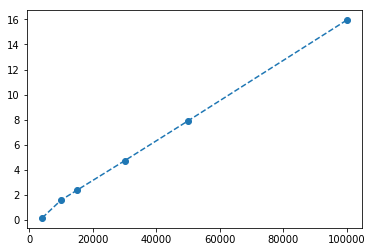

In [11]:
# change `time` with the results from the cell above in ``XXmin XXs`` format 
time = "15min 56s,07min 54s,04min 43s,02min 22s,01min 35s,00min39.1 s" 
time = [float(x[:2]) + float(x[6:-1]) / 60. for x in str(time).split(",")]

plt.plot(n_cells_list, time, label="scVI", marker='o', linestyle='--')

### Table 1. log likelihood

In [ ]:
# load dataset 
brainlarge_dataset = BrainLargeDataset()

# set hyperparameters 
n_epochs= 125
lr=0.001
use_batches=False
use_cuda=True

In [ ]:
n_cells_list = [100000, 50000, 30000, 15000, 10000, 4000]

for n_cells in n_cells_list:
    brainlarge_dataset.subsample_cells(n_cells) 
    
    brainlarge_vae = VAE(brainlarge_dataset.nb_genes, n_batch=brainlarge_dataset.n_batches * use_batches) 
    brainlarge_infer = VariationalInference(brainlarge_vae,
                                 brainlarge_dataset,
                                 train_size=0.9,
                                 use_cuda=use_cuda,
                                 frequency=5) 
    % time brainlarge_infer.train(n_epochs=n_epochs, lr=lr)
    log_likelihood = adapt_encoder(brainlarge_infer, n_path=1) 
    print(str(n_cells) + " cells log likelihood: " + str(log_likelihood)) 

### Figure 2. imputation (Uniform Corruption) 

In [4]:
# load dataset 
cortex_dataset = CortexDataset()

# set hyperparameters 
n_epochs=500
lr=0.0004
use_batches=False
use_cuda=True

File data/expression.bin already downloaded
Preprocessing Cortex data
Finished preprocessing Cortex data



Median of Median: 2.3131
Mean of Median for each cell: 2.4907


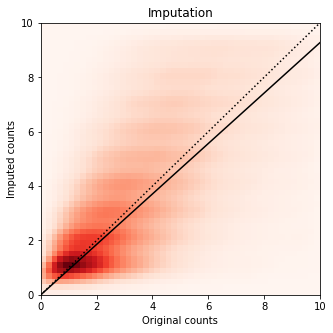

<Figure size 432x288 with 0 Axes>

In [9]:
# train the model

n_epochs=250
lr=0.001
cortex_vae = VAE(cortex_dataset.nb_genes, n_batch=cortex_dataset.n_batches * use_batches)
trainer_cortex_vae = UnsupervisedTrainer(cortex_vae,
                                 cortex_dataset,
                                 train_size=0.9,
                                 use_cuda=use_cuda)

trainer_cortex_vae.corrupt_posteriors(rate=0.09, corruption="uniform")
trainer_cortex_vae.train(n_epochs=n_epochs)
trainer_cortex_vae.uncorrupt_posteriors()

original_list, imputed_list = trainer_cortex_vae.train_set.imputation_benchmark(n_samples=1, verbose=True)

### Figure 3. interpreting latent space; tsne plot and heatmap

CORTEX tsne plot

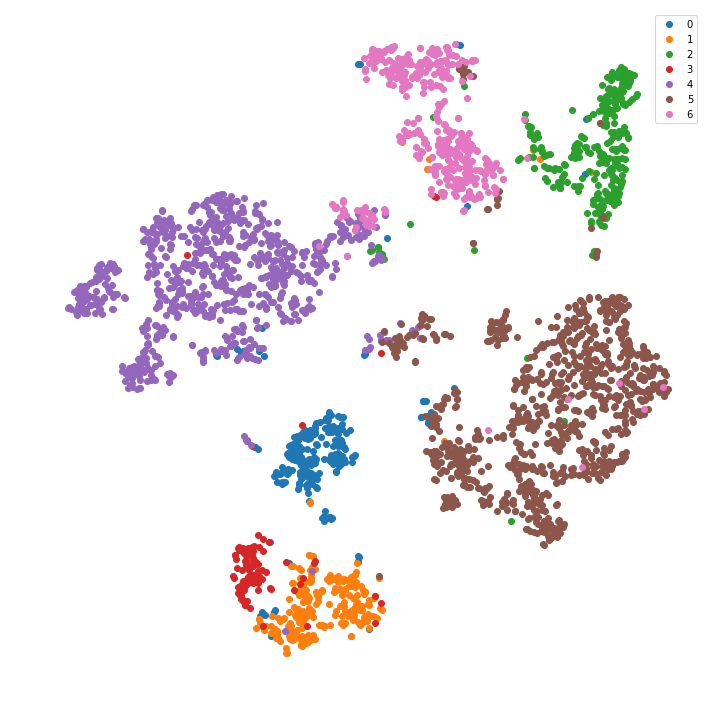

In [6]:
cortex_infer.show_t_sne('sequential', n_samples=False, color_by='labels')

CORTEX distance matrix heat map

In [ ]:
celltypes = np.array(['astrocytes_ependymal', 'endothelial-mural', 'interneurons',
       'microglia', 'oligodendrocytes', 'pyramidal CA1', 'pyramidal SS'],
      dtype='|S64')
beloved_order = np.array(['interneurons', 'pyramidal SS', 'pyramidal CA1', 'endothelial-mural', \
 'microglia', 'astrocytes_ependymal', 'oligodendrocytes'])


mapping = [np.where(beloved_order == x)[0][0] for x in celltypes]

def visualize_distance(latent, labels, mapping):
    sorting_labels = [mapping[int(x)] for x in c_train]
    order_latent = np.vstack([x for _, x in sorted(zip(sorting_labels, latent), key=lambda pair: pair[0])])
    order_label = np.vstack([x for _, x in sorted(zip(sorting_labels, labels), key=lambda pair: pair[0])])
    
    distance = scipy.spatial.distance_matrix(order_latent, order_latent)  
    
    fig = plt.figure(figsize=(10, 10)) 
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 70], height_ratios=[1, 70])
    gs.update(wspace=0.05, hspace=0.05)
    ax0 = plt.subplot(gs[1])
    ax0.imshow(order_label.T, cmap='tab10', interpolation='none', aspect=100)
    ax0.axis('off')
    ax1 = plt.subplot(gs[3], sharex=ax0)
    ax1.imshow(distance, cmap='hot', interpolation='none')
    ax1.axis('off')
    ax2 = plt.subplot(gs[2], sharey=ax1)
    ax2.imshow(order_label, cmap='tab10', interpolation='none', aspect=1/100.)
    ax2.axis('off')
    
visualize_distance(latent, c_train, mapping) # c_train is labels for training set 

HEMATO tsne plot

In [7]:
# load dataset 
hemato_dataset = HematoDataset() 

File data/HEMATO/bBM.raw_umifm_counts.csv.gz already downloaded
File data/HEMATO/data.zip already downloaded
Preprocessing Hemato data
Finished preprocessing Hemato data


In [8]:
# set hyperparameters 
n_epochs=200
lr=0.0004
use_batches=False
use_cuda=True

# train the model 
hemato_vae = VAE(hemato_dataset.nb_genes, n_batch=hemato_dataset.n_batches * use_batches)
hemato_infer = VariationalInference(hemato_vae,
                                    hemato_dataset,
                                    train_size=0.9, 
                                    use_cuda=use_cuda, 
                                    frequency=5)
hemato_infer.train(n_epochs=n_epochs, lr=lr)

training: 100%|██████████| 200/200 [01:45<00:00,  1.89it/s]


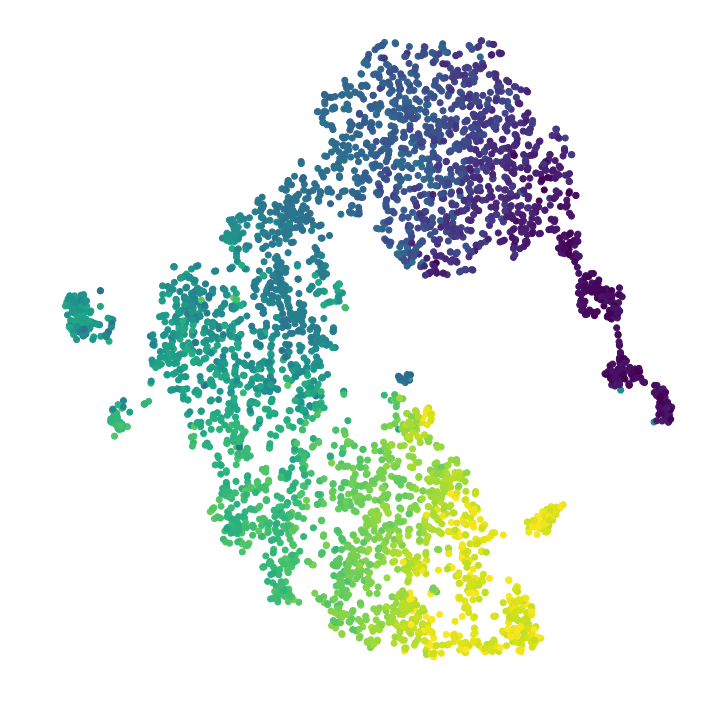

In [9]:
# visualize latent space 
hemato_infer.show_t_sne('sequential', n_samples=False, color_by='scalar')

HEMATO distance matrix heat map

In [ ]:
visualize_distance(latent_scVI, logit(meta.iloc[:, 2]), "scVI")

ZINB 

In [22]:
# generate random data 
n_cells = 3000 
n_genes = 10 
n_clusters = 11 

mu = 4.0
theta = 2.0
dropout = 0.7
p = mu / (mu + theta)
r = theta 

l_train = np.random.gamma(r, p / (1-p), size=(n_cells, n_genes))
expression = np.random.poisson(l_train)
expression *= np.random.binomial(1, 1-dropout, size=(n_cells, n_genes))
expression = expression[np.sum(expression, axis=1) > 0]
labels = np.random.randint(0, n_clusters, size=expression.shape[0])

zinb_dataset = GeneExpressionDataset(*GeneExpressionDataset.get_attributes_from_matrix(expression, labels=labels))

In [23]:
# set hyperparameters 
n_epochs=200
lr=0.0004
use_batches=False
use_cuda=True

# train the model 
zinb_vae = VAE(zinb_dataset.nb_genes, n_batch=zinb_dataset.n_batches * use_batches)
zinb_infer = VariationalInference(zinb_vae, 
                                  zinb_dataset, 
                                  train_size=2/3, 
                                  use_cuda=use_cuda, 
                                  frequency=5)
zinb_infer.train(n_epochs=n_epochs, lr=lr)

training: 100%|██████████| 200/200 [00:28<00:00,  6.97it/s]


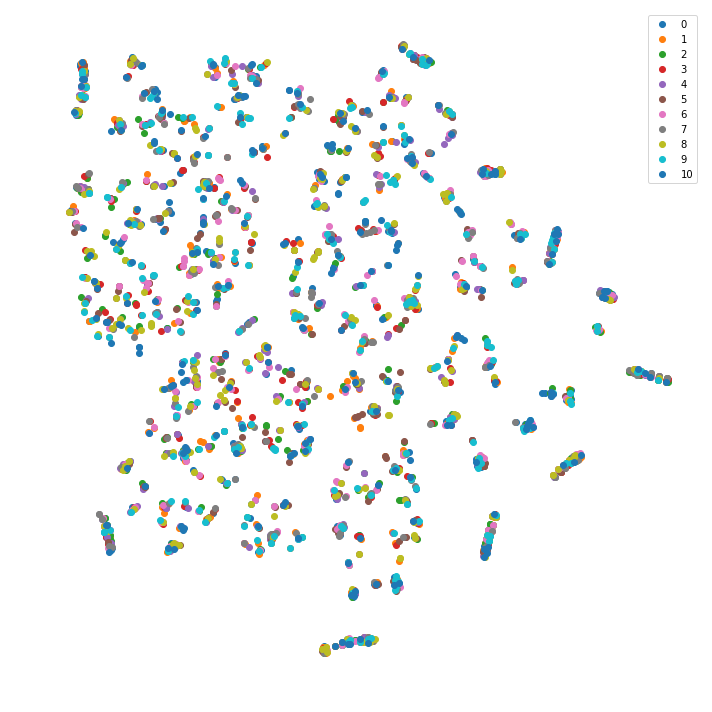

In [24]:
# visualize latent space  
zinb_infer.show_t_sne('sequential', n_samples=False, color_by='labels') 

ZINB Distance Matrix Heat Map

In [ ]:
def visualize_distance(latent, labels, algorithm):
    order_latent = np.vstack([x for _, x in sorted(zip(labels,latent), key=lambda pair: pair[0])])
    order_label = np.vstack([y for y, x in sorted(zip(labels,latent), key=lambda pair: pair[0])])
    distance = scipy.spatial.distance_matrix(order_latent, order_latent)  
    
    fig = plt.figure(figsize=(10, 10)) 
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 70], height_ratios=[1, 70])
    gs.update(wspace=0.05, hspace=0.05)
    ax0 = plt.subplot(gs[1])
    ax0.imshow(order_label.T, cmap='Dark2', interpolation='none', aspect=100)
    ax0.axis('off')
    ax1 = plt.subplot(gs[3], sharex=ax0)
    ax1.imshow(distance, cmap='hot', interpolation='none')
    ax1.axis('off')
    ax2 = plt.subplot(gs[2], sharey=ax1)
    ax2.imshow(order_label, cmap='Dark2', interpolation='none', aspect=1/100.)
    ax2.axis('off')
    #plt.tight_layout()
    fig.suptitle("Cell-Cell Similarity matrix on the "+ algorithm + " latent space", fontsize=16, y=0.92) 
    
visualize_distance(latent_scVI, labels, "scVI") 

### Figure 4. batch effect removal; tsne plot

In [4]:
# load retina dataset 
retina_dataset = RetinaDataset()

File data/retina.loom already downloaded
Preprocessing dataset
Finished preprocessing dataset


In [5]:
# set hyperparameters 
n_epochs=200
lr=0.0005
use_batches=True
use_cuda=True

# train the model
retina_vae = VAE(retina_dataset.nb_genes, n_batch=retina_dataset.n_batches * use_batches)
retina_infer = VariationalInference(retina_vae,
                                 retina_dataset,
                                 train_size=0.9,
                                 use_cuda=use_cuda,
                                 frequency=5)
retina_infer.train(n_epochs=n_epochs, lr=lr)

training: 100%|██████████| 200/200 [20:04<00:00,  6.02s/it]


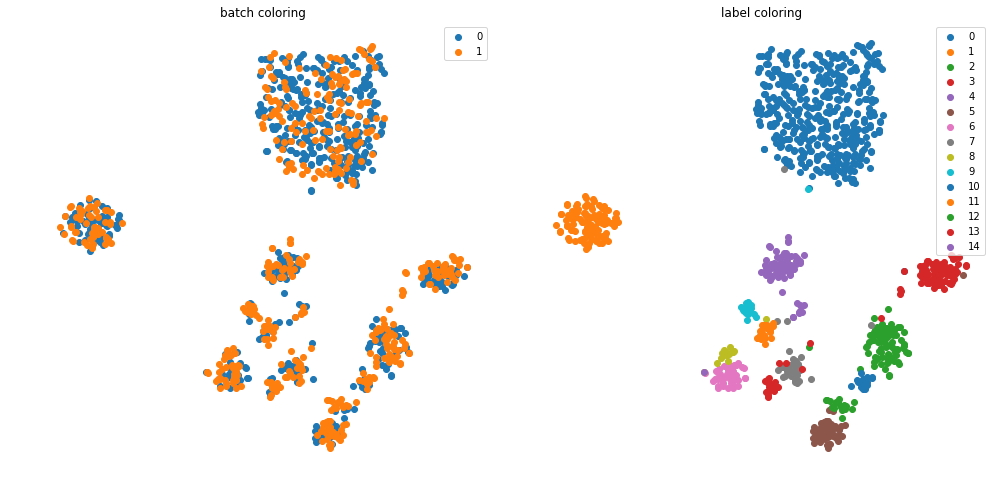

In [6]:
# visualize latent space 
retina_infer.show_t_sne('sequential', color_by='batches and labels')

### Figure 5. differential expression; plots

In [26]:
# load dataset 
pbmc_dataset = PbmcDataset()

File data/gene_info_pbmc.csv already downloaded
File data/pbmc_metadata.pickle already downloaded


In [27]:
# set hyperparameters 
from scvi.inference import UnsupervisedTrainer
n_epochs=300
lr=0.0004
use_batches=False
use_cuda=True

# train the model
pbmc_vae = VAE(pbmc_dataset.nb_genes, n_batch=pbmc_dataset.n_batches * use_batches, dropout_rate=0.2)
pbmc_trainer = UnsupervisedTrainer(pbmc_vae, 
                                   pbmc_dataset,
                                   train_size=1.0,
                                   use_cuda=use_cuda, 
                                  kl=1)
pbmc_trainer.train(n_epochs=n_epochs, lr=lr, eps=0.01) 

training: 100%|██████████| 300/300 [05:18<00:00,  1.06s/it]


In [28]:
import pandas as pd
interest = "BDC"
couple_celltypes = (4, 0) # 4 
rank_auc = 800
p_prior = 0.25

# getting p_values
p_value = pbmc_dataset.de_metadata[interest + "_adj.P.Val"]
signed_p_value = - np.log10(p_value) * np.sign(pbmc_dataset.de_metadata[interest + "_logFC"])

cell_a_idx = np.random.choice(np.where((pbmc_dataset.labels==4).ravel())[0], 200)
cell_b_idx = np.random.choice(np.where((pbmc_dataset.labels==0).ravel())[0], 200)
pbmc_trainer.selected_posterior_BDC = pbmc_trainer.create_posterior(
    indices=np.concatenate((cell_a_idx, cell_b_idx))
)
st = pbmc_trainer.selected_posterior_BDC.differential_expression_score('Dendritic Cells', 'B cells',
                                                                   M_sampling=300, 
                                                                   M_permutation=40000)

BDC
Detected  1077  genes with scVI
Detected  879  genes with microarray


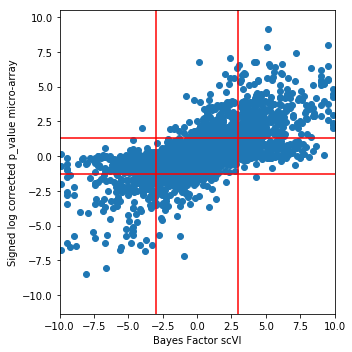

In [18]:
plt.figure(figsize=(5, 5))
plt.scatter(st, signed_p_value)
plt.axvline(x=3, c="r")
plt.axvline(x=-3, c="r")
plt.axhline(y=np.log10(0.05), c="r")
plt.axhline(y=-np.log10(0.05), c="r")
plt.xlim(-10,10)
plt.xlabel("Bayes Factor scVI")
plt.ylabel("Signed log corrected p_value micro-array")
plt.tight_layout()
#plt.savefig(interest + "_Bayes_factor_vs_micro_array.pdf", dpi=300)
print(interest)
print("Detected ", np.sum(2 * np.abs(st) >= 6), " genes with scVI")
print("Detected ", np.sum(p_value <= 0.05), " genes with microarray")

### Figure 6. plots 

In [ ]:
# PBMC
list_plots = ["emp_gene_detection", "emp_lib_size", \
              cell_qc[2], cell_qc[4], cell_qc[5]]
trials = 5
list_cell_types = np.unique(clusters)

res = np.zeros((trials, len(list_cell_types), len(list_plots), 4))

for t in range(trials):
    # train the model for each random seed
    tf.reset_default_graph()
    expression = tf.placeholder(tf.float32, (None, expression_train.shape[1]), name='x')
    kl_scalar = tf.placeholder(tf.float32, (), name='kl_scalar')
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, epsilon=epsilon)
    training_phase = tf.placeholder(tf.bool, (), name='training_phase')

    model = scVI.scVIModel(expression=expression, kl_scale=kl_scalar, \
                             optimize_algo=optimizer, phase=training_phase, \
                              library_size_mean=mean, library_size_var=var, \
                              n_latent=5, log_variational=True)

    # Session creation
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    train_model(100, expression_train, expression_test, model.train_step)
    # then perform the analysis for each cell type
    for k in list_cell_types:

        indices = np.where(c_train == k)[0]
        data = expression_train[indices]
        qc = qc_train[indices]
        results = sample_posterior(data)
        res[t, k - 1, 0] = normalize_plot(process_proba(results["dropout"]), \
               process_proba(results["dropout"], results["mean"], results["dispersion"]), 
               np.sum(data > 0, axis=1), s="number of gene detected", plot=False)
        res[t, k - 1, 1] = normalize_plot(process_proba(results["dropout"]), \
               process_proba(results["dropout"], results["mean"], results["dispersion"]), 
               np.log(np.sum(data, axis=1)), s="log average counts per cells",  plot=False)
        for i, qc_number in enumerate([2, 4, 5]):
            res[t, k - 1, 2 + i] = normalize_plot(process_proba(results["dropout"]), \
                   process_proba(results["dropout"], results["mean"], results["dispersion"]), \
                   qc[:, qc_number], cell_qc[qc_number], plot=False)


t_stats = np.zeros((trials, 6, len(list_plots), 2))
p_values = np.zeros_like(t_stats)
# get the t_stats from the regression value
for t in range(5):
    for k in range(6):
        for i in range(len(list_plots)):
            for j in range(2):
                r = res[t, k, i, 2*j +1]
                n = cell_info[k]
                t_stats[t, k, i, j] = r * np.sqrt((n - 2)/(1 - r**2))
                p_values[t, k, i, j] = 2 * scipy.stats.distributions.t.sf(np.abs(t_stats[t, k, i, j]), n)
                
p_values = p_values.reshape((trials * 6, len(list_plots), 2))
t_stats = t_stats.reshape((trials * 6, len(list_plots), 2))
scores = - np.sign(t_stats) * np.log10(p_values)

import matplotlib.patches as mpatches
list_plots = ["% Gene detection", "Library size", \
               "Mean reads per UMI", "% Mapped reads", "% Genome not gene"]

def finite(x):
    return x[np.isfinite(x)]

data_1 = [finite(scores[:, i, 0]) for i in [0, 1, 2]]
data_1b = [finite(scores[:, i, 1]) for i in [0, 1, 2]]

props = dict(widths=0.2,patch_artist=True, medianprops=dict(color="black"), whis=[5, 95], sym="")
fig, ax1 = plt.subplots(figsize=(7, 5))
ax1.hlines(y=0, xmin=-0.5, xmax=2.5, color='blue', zorder=1)    
ax1.set_ylabel('p-value for correlation with library size QC', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()

bp1 = ax1.boxplot(data_1, positions=[0, 1, 2], **props)
bp1b = ax1.boxplot(data_1b, positions=[0.2, 1.2, 2.2], **props)
ax1.hlines(y=0, xmin=-0.5, xmax=2.5, color='blue', zorder=1)
for patch in bp1['boxes']:
    patch.set_facecolor('lightblue')
for patch in bp1b['boxes']:
    patch.set_facecolor('c')
    
data_2 = [finite(scores[:, i, 0]) for i in [3, 4]]
data_2b = [finite(scores[:, i, 1]) for i in [3, 4]]
ax2.hlines(y=0, xmin=2.5, xmax=5, color='green', zorder=1)
ax2.set_ylabel('p-value for correlation with alignment QC', color='g')
ax2.tick_params('y', colors='g')
bp2 = ax2.boxplot(data_2, positions=[3, 4], **props)
bp2b = ax2.boxplot(data_2b, positions=[3.2, 4.2], **props)
for patch in bp2['boxes']:
    patch.set_facecolor('lightgreen')
for patch in bp2b['boxes']:
    patch.set_facecolor('lime')

ax1.set_xlim((-0.5, 5))
ax1.set_xticks([0, 1, 2, 3, 4])
ax1.set_xticklabels([list_plots[i] for i in [0, 1, 2, 3, 4]], rotation=30)


m1, = plt.plot([], [], c='lightblue' , marker='s', markersize=15,
              fillstyle='left', linestyle='none')
m2, = plt.plot([], [], c='lightgreen' , marker='s', markersize=15,
              fillstyle='right', linestyle='none')
m3, = plt.plot([], [], c='c' , marker='s', markersize=15,
              fillstyle='left', linestyle='none')
m4, = plt.plot([], [], c='lime' , marker='s', markersize=15,
              fillstyle='right', linestyle='none')

#---- Plot Legend ----



plt.legend(((m2, m1), (m3, m4)), ('Ber',"NB"), numpoints=1, labelspacing=1, fontsize=12, loc="lower right")

fig.suptitle("Zero distribution vs cell quality metrics (BRAIN-SMALL)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Figure 7. posterior plots

In [3]:
def draw_custom_hist_data(x, y):
    
    # First digitize the original values
    # makes a K x K matrix
    K = 15
    hist, count_bins = np.histogram(mapping(y), bins=K)
    y_bin_assign = np.digitize(mapping(y), count_bins)
    
    # now we get for each value and for each eventual posterior the histogram assignment
    x_bin_assign = np.digitize(mapping(x), count_bins)
    
    #print np.unique(y_bin_assign)
    # Let us construct the full matrix to visualize
    
    mat = np.zeros(shape=(K, K))
    for k in range(1, K+1):
        assign_slice = x_bin_assign[y_bin_assign == k].flatten()
        assign_slice = assign_slice[assign_slice > 0]
        assign_slice = assign_slice[assign_slice < K+1]
        for i in range(1, K+1):
            assign_slice = np.append(assign_slice, i)
        #print np.unique(assign_slice)
        _, mat[k-1] = np.unique(assign_slice, return_counts=True)
        
    #print mat
    mat = mat / np.sum(mat, axis=0)
    plt.xticks(np.arange(mat.shape[0])[::2], inv_mapping(count_bins).astype(np.int)[::2])
    plt.yticks(np.arange(mat.shape[0])[::2], inv_mapping(count_bins).astype(np.int)[::2])
    plt.imshow(mat.T, origin='lower', interpolation="none")

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


File data/expression.bin already downloaded
Preprocessing Cortex data
Samd10
Fau
Finished preprocessing Cortex data
training: 100%|██████████| 100/100 [00:19<00:00,  5.13it/s]


(2704, 250)
(2704,)


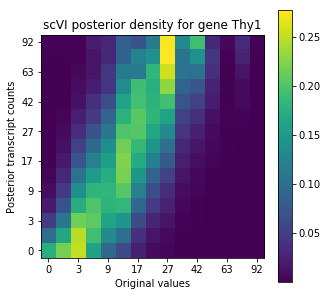

In [14]:
n_samples=30 # 250 is scVI-reproducibility
x, y = trainer_cortex.train_set.generate(genes=['FAU'], n_samples=n_samples) 
# "THY1" ?  253 => FAU in gene names index

x = x.squeeze()
y = y.squeeze()

print(x.shape)  # (n_batch * (n_genes == 1) * n_samples)
print(y.shape)  # (n_batch * (n_genes == 1) * n_samples)
plt.figure(figsize=(5, 5))
draw_custom_hist_data(x,y)
plt.title("scVI posterior density for gene FAU")
plt.xlabel("Original values")
plt.ylabel("Posterior transcript counts")
plt.colorbar()

Text(0,0.5,'scVI posterior uncertainty')

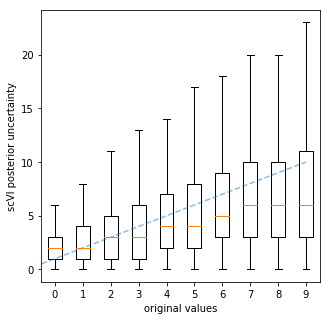

In [15]:
data = [x[y == t].flatten() for t in range(0, 10)]
plt.figure(figsize=(5, 5))
plt.boxplot(data, sym="")
plt.xticks(range(1, 11), range(0, 10))


l = np.linspace(0, 10, 50)
plt.plot(l, l, linestyle="--", alpha=0.5)
plt.xlabel("original values")
plt.ylabel("scVI posterior uncertainty")

### Figure 8. silhouette and batch mixing entropy 

In [11]:
def barplot(mean, alg, title, save=None, interest=0):
    N = 4

    ind = np.arange(len(alg))  # the x locations for the groups
    width = 0.35       # the width of the bars
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(111)
    rects1 = ax.barh(ind, mean, width, color='r')
    if interest > 0:
        func = np.min
    else:
        func = np.max
    ax.axvline(x=func(mean), ymin=0, ymax = 5, linewidth=1, color='b')

    # add some text for labels, title and axes ticks
    ax.set_xlabel(title)
    ax.set_yticks(ind)
    ax.set_yticklabels(alg)
    
    plt.show()

def barplot_CITE_list(mean, alg, title, save=None, interest=0, figsize=None):
    

    ind = np.arange(len(alg))  # the x locations for the groups
    width = 0.25       # the width of the bars
    
    if figsize is None:
        fig, ax1 = plt.subplots()
    else:
        fig, ax1 = plt.subplots(figsize=figsize)
    rect1 = ax1.barh(ind, data[0], width, color="b")
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_xlabel('Spearman Correlation', color='b')
    ax1.tick_params('x', colors='b')    
    
    ax2 = ax1.twiny()
    rect2 = ax2.barh(ind + width, data[1], width, color="r")
    ax2.set_xlabel('Fold Enrichment', color='r')
    ax2.tick_params('x', colors='r')

    ax1.set_title(title, y=-0.3)
    ax1.set_yticks(ind + width)
    ax1.set_yticklabels(alg)
    plt.tight_layout()
    
def barplot_list(data, alg, title, save=None, interest=0, prog=False, figsize=None):
    ind = np.arange(len(alg))  # the x locations for the groups
    width = 0.25       # the width of the bars
    if figsize is None:
        fig = plt.figure()

    else:
        fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    
    if len(data[0]) == 3:
        width = 0.25       # the width of the bars
    
    else:
        width = 0.15
        
        
    rects = [] 
    color = ["r", "g", "y", "b", "purple"]
    if prog:
        color = ['darkred', "red", "tomato", "salmon"]
    for i in range(len(data[0])):    
        rects.append(ax.barh(ind + i * width, data[:,i], width, color=color[i]))
        
    anchor_param = (0.8, 0.8)
    leg_rec = [x[0] for x in rects]
    leg_lab = ('ASW', 'ARI', 'NMI', "BE", "BASW")
    if prog:
        leg_lab = ["2", "3", "4", "7"]
    ax.legend(leg_rec, leg_lab[:len(data[0])] )

    # add some text for labels, title and axes ticks
    ax.set_xlabel(title)
    ax.set_yticks(ind + width)
    ax.set_yticklabels(alg)
    plt.tight_layout()

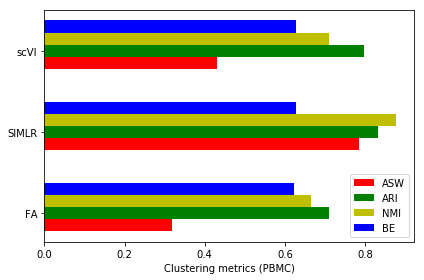

In [89]:
# (a) PBMC
asw, nmi, ari, uca = pbmc_trainer.train_set.clustering_scores()
be = pbmc_trainer.train_set.entropy_batch_mixing()
# asw, ari, nmi, be = .42970678, 0.79660054333307828, 0.70952528367336209, 0.627160634386 # in scVI-reproducibility
alg = ["FA", "SIMLR", "scVI"]
data = np.array([[0.31893232823756423, 0.70949147594234441, 0.6639320594878495, 0.622334973356],\
        [0.78464960298125097, 0.83127101206256038, 0.87814668767539328, 0.628411486367],\
        [asw, ari, nmi, be]])

barplot_list(data, alg, 'Clustering metrics (PBMC)')

training: 100%|██████████| 400/400 [01:14<00:00,  5.34it/s]
Clustering Scores:
Silhouette: 0.2109
NMI: 0.7406
ARI: 0.6935
UCA: 0.7641
0.21088849 0.7405945587161528 0.6934866493706187 0.7640532544378699


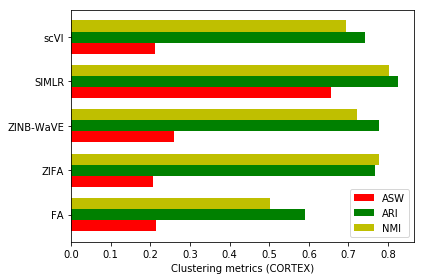

In [14]:
# (b) CORTEX Clustering Metrics 
alg = ["scVI"] 

alg = ["FA", "ZIFA", "ZINB-WaVE", "SIMLR", "scVI"]

n_epochs=250
lr=0.001
cortex_vae = VAE(cortex_dataset.nb_genes, n_batch=cortex_dataset.n_batches * use_batches)
trainer_cortex = UnsupervisedTrainer(cortex_vae,
                                 cortex_dataset,
                                 train_size=0.75,
                                 use_cuda=use_cuda)
trainer_cortex.train(400)
asw, nmi, ari, uca = trainer_cortex.train_set.clustering_scores()
print(asw, nmi, ari, uca)
# asw, nmi, ari = 0.2997168, 0.77794597391165898, 0.7444437120757863 # in scVI-reproducibility

data = np.array([[0.21391998556424938, 0.59116624750943825, 0.50231747503265922], \
        [0.20659129809077773, 0.76804626919745633, 0.77806177522581543], \
        [0.26024010642172596, 0.77821596684230276, 0.72163060519162336], \
        [0.65496546363239816, 0.82448501471354962, 0.80190025231822593], \
        [asw, nmi, ari]])
barplot_list(data, alg, 'Clustering metrics (CORTEX)')

File data/citeSeq/cbmc/cbmc_rna.csv.gz already downloaded
File data/citeSeq/cbmc/cbmc_adt.csv.gz already downloaded
File data/citeSeq/cbmc/cbmc_adt_centered.csv.gz already downloaded
Preprocessing data
Selecting only HUMAN genes (20400 / 36280)
Finish preprocessing data
training: 100%|██████████| 100/100 [02:56<00:00,  1.76s/it]
Overlap Scores:
Spearman Correlation: 0.1415
Fold Enrichment: 10.0041


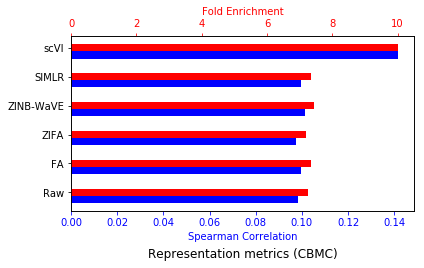

In [15]:
# (c) CBMC Representation Metrics 
cbmc_dataset = CbmcDataset() 

vae = VAE(cbmc_dataset.nb_genes)
trainer_cbmc = UnsupervisedTrainer(vae, cbmc_dataset, train_size=0.75)
trainer_cbmc.train(100)

spearman_correlation_scvi, fold_enrichement_scvi = trainer_cbmc.train_set.nn_overlap_score()
# spearman_correlation_scvi, fold_enrichement_scvi = 0.10619144922991411,  7.7559 # in scVI-reproducibility
alg = ["Raw", "FA", "ZIFA", "ZINB-WaVE", "SIMLR", "scVI"]
data = np.array([[0.098473750393067855, 7.2649], \
         [0.099746934926233391, 7.3459],\
         [0.097387613957984093, 7.1958], \
         [0.10141150581589038, 7.4518], \
         [0.099619616472917824, 7.3378], \
        [spearman_correlation_scvi, fold_enrichement_scvi]]).T
barplot_CITE_list(data, alg, 'Representation metrics (CBMC)')

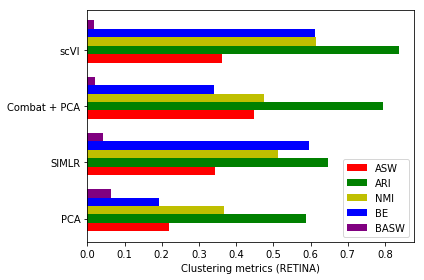

In [77]:
# (d) RETINA Clustering Metrics 
retina_dataset = RetinaDataset() 

vae = VAE(retina_dataset.nb_genes)
retina_trainer = UnsupervisedTrainer(vae, retina_dataset)
retina_trainer.train(100)

asw, nmi, ari, uca = retina_trainer.train_set.clustering_scores()
be = retina_trainer.train_set.entropy_batch_mixing()

# In scVI-reproducibility
# asw = 0.36126289
# ari = 0.83652908297624851
# nmi = 0.61592297966666154
# be = 0.61157293916
basw = 0.0185152 # not computed here

retina_data = np.array([[0.21954027735402515, 0.58685860355428821, 0.36856986097377797, 0.192647888467, 0.0624201044534],\
        [0.34417779654030661, 0.64755125928853896, 0.51136144259466121, 0.597048161687, 0.0409665873338],\
        [0.44694698300835106, 0.794144880698191, 0.47583467153476738, 0.34069311837, 0.019781812657], \
        [asw,ari,nmi,be,basw]])
alg = ["PCA", "SIMLR", "Combat + PCA", "scVI"]

barplot_list(retina_data, alg, 'Clustering metrics (RETINA)')

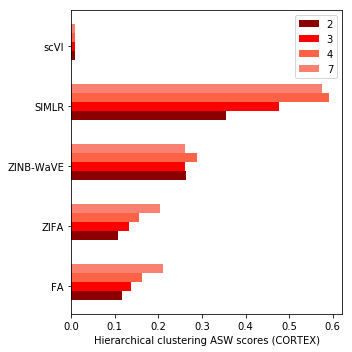

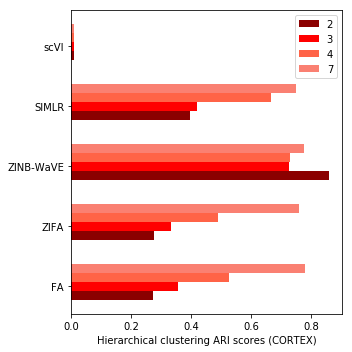

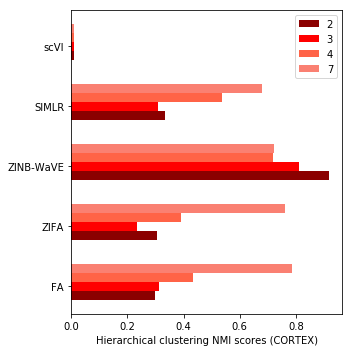

In [50]:
# (e) (f) (g) CORTEX Hierarchical Clustering Scores 

alg = ["FA","ZIFA","ZINB-WaVE","SIMLR", "scVI"]

scVI = np.array([[0.01,0.01, 0.01],
[0.01,0.01, 0.01],
[0.01, 0.01, 0.01],
[0.01, 0.01, 0.01]]).T
simlr = np.array([[0.35581114086547649, 0.39763026135241941, 0.33581111107441836],
[0.47594514783811925, 0.42182382206636898, 0.30828147637529074],
[0.59177936314164903, 0.667961741036047, 0.53600416126351158],
[0.57610561187014786, 0.75222293463073531, 0.67924145540151004]]).T
zinb = np.array([[0.26307611328993241, 0.86133243308042906, 0.91825852643537653],
[0.26120556769903069, 0.72846126262601396, 0.81089804731570525],
[0.28948372843281256, 0.7307396743553678, 0.71783886252317064],
[0.26175088291560739, 0.77674732406327229, 0.72310898818408831]]).T
zifa = np.array([[0.10760864940650154, 0.27739547166803474, 0.3047726295034825],
[0.13207018700791912, 0.33238196759272998, 0.23560128683050038],
[0.15602621812120895, 0.4890464265132512, 0.39260959628267939],
[0.20493195811497675, 0.7621022202234099, 0.76261580271279172]]).T
fa = np.array([[0.11581131621741773, 0.27312842428258505, 0.29890142393022651],
[0.13797953173246824, 0.35827752246474137, 0.31243455865964415],
[0.16330256646100386, 0.5281002482621574, 0.43436435453448607],
[0.21151757370266544, 0.78013724807955642, 0.78688963604064266]]).T

data = np.concatenate([arr[np.newaxis,:,:] for arr in [fa,zifa,zinb,simlr,scVI]])

for i in range(3):
    barplot_list(data[:,i,:], alg, 'Hierarchical clustering ' + l[i][1] +' scores (CORTEX)', prog=True, figsize=(5, 5))

### Figure 9. imputation

In [7]:
# load dataset 
cortex_dataset = CortexDataset()

File data/expression.bin already downloaded
Preprocessing Cortex data
Finished preprocessing Cortex data


training: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]
Imputation Scores [corruption:binomial - rate:0.10] on  train after 1:
Median of Median: 3.6613
Mean of Median for each cell: 5.8877


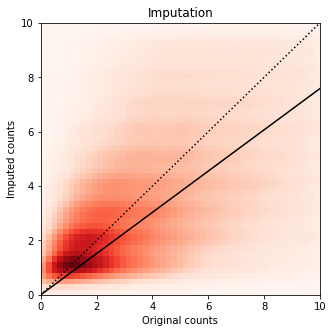

<Figure size 432x288 with 0 Axes>

In [9]:
# set hyperparameters 
n_epochs=200
lr=0.0004
use_batches=False
use_cuda=True

# train the model
cortex_vae = VAE(cortex_dataset.nb_genes, n_batch=cortex_dataset.n_batches * use_batches)

# CORTEX 
cortex_infer = UnsupervisedTrainer(cortex_vae, 
                                   cortex_dataset,
                                   train_size=0.6,
                                   use_cuda=use_cuda,
                                   frequency=5) 
cortex_infer.train(n_epochs=n_epochs, lr=lr)
original_list, imputed_list = cortex_infer.imputation('train', 
                                                       rate=0.1, 
                                                       corruption="binomial", 
                                                       verbose=True)

In [ ]:
log_likelihood = adapt_encoder(brainlarge_infer, n_path=1) 
print('log_likelihood: ' + str(log_likelihood))

### Figure 10. imputation

training: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]
Imputation Scores [corruption:binomial - rate:0.10] on  train after 1:
Median of Median: 4.0031
Mean of Median for each cell: 5.4362


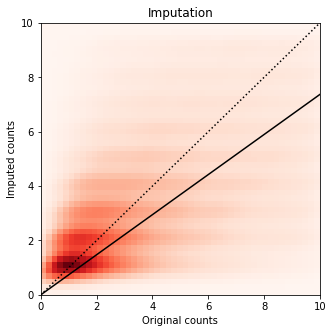

<Figure size 432x288 with 0 Axes>

In [10]:
# CORTEX 
original_list, imputed_list = cortex_infer.imputation('train', 
                                                       rate=0.1, 
                                                       corruption="binomial", 
                                                       verbose=True)

### Figure 11. imputation (Binomial Corruption)

CORTEX 

In [11]:
# load dataset 
cortex_dataset = CortexDataset()

File data/expression.bin already downloaded
Preprocessing Cortex data
Finished preprocessing Cortex data


In [12]:
# train the model
cortex_vae = VAE(cortex_dataset.nb_genes, n_batch=cortex_dataset.n_batches * use_batches)
cortex_infer = VariationalInference(cortex_vae,
                                 cortex_dataset,
                                 train_size=0.9,
                                 use_cuda=use_cuda,
                                 frequency=5)
cortex_infer.train(n_epochs=n_epochs, lr=lr)

training: 100%|██████████| 200/200 [00:43<00:00,  4.64it/s]


training: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]
Imputation Scores [corruption:binomial - rate:0.10] on  train after 1:
Median of Median: 3.3972
Mean of Median for each cell: 5.2238


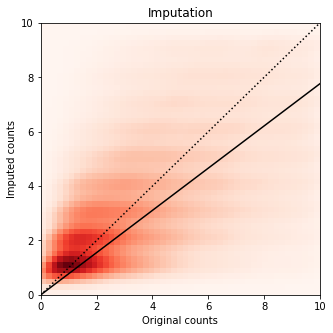

<Figure size 432x288 with 0 Axes>

In [13]:
original_list, imputed_list = cortex_infer.imputation('train', 
                                                      rate=0.1, 
                                                      corruption="binomial", 
                                                      verbose=True)

BRAIN_LARGE 

In [14]:
# load dataset 
brainlarge_dataset = BrainLargeDataset()

File data/genomics.h5 already downloaded
Preprocessing Brain Large data
720 genes subsampled
1306127 cells subsampled
Finished preprocessing data


In [17]:
# set hyperparameters
n_epochs=200
lr=1e-3
use_batches=False
use_cuda=True

# train the model
brainlarge_vae = VAE(brainlarge_dataset.nb_genes, n_batch=brainlarge_dataset.n_batches * use_batches)
brainlarge_infer = VariationalInference(brainlarge_vae,
                                 brainlarge_dataset,
                                 train_size=0.9,
                                 use_cuda=use_cuda,
                                 frequency=5)
brainlarge_infer.train(n_epochs=n_epochs, lr=lr)

training: 100%|██████████| 200/200 [5:38:43<00:00, 101.62s/it]  


In [ ]:
original_list, imputed_list = brainlarge_infer.imputation('train', 
                                                           rate=0.1, 
                                                           corruption="binomial", 
                                                           verbose=True)

### Figure 12. DE; plots

CD
Detected  321  genes with scVI
Detected  111  genes with microarray


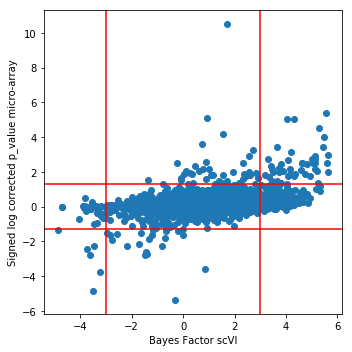

In [29]:
# PBMC 
interest = "CD"
couple_celltypes = (3, 2)
rank_auc = 111
p_prior = 0.03

p_value = pbmc_dataset.de_metadata[interest + "_adj.P.Val"]
signed_p_value = - np.log10(p_value) * np.sign(pbmc_dataset.de_metadata[interest + "_logFC"])

cell_a_idx = np.random.choice(np.where((pbmc_dataset.labels==3).ravel())[0], 100)
cell_b_idx = np.random.choice(np.where((pbmc_dataset.labels==2).ravel())[0], 100)
pbmc_trainer.selected_posterior_CD = pbmc_trainer.create_posterior(indices=np.concatenate((cell_a_idx, cell_b_idx)))
st = pbmc_trainer.selected_posterior_CD.differential_expression_score(3,2,M_sampling=200, M_permutation=40000)

plt.figure(figsize=(5, 5))
plt.scatter(st, signed_p_value)
plt.axvline(x=3, c="r")
plt.axvline(x=-3, c="r")
plt.axhline(y=np.log10(0.05), c="r")
plt.axhline(y=-np.log10(0.05), c="r")
plt.xlabel("Bayes Factor scVI")
plt.ylabel("Signed log corrected p_value micro-array")
plt.tight_layout()
#plt.savefig(interest + "_Bayes_factor_vs_micro_array.pdf", dpi=300)
print(interest)
print("Detected ", np.sum(2 * np.abs(st) >= 6), " genes with scVI")
print("Detected ", np.sum(p_value <= 0.05), " genes with microarray")

Text(0,0.5,'Percentage of genes in each bin')

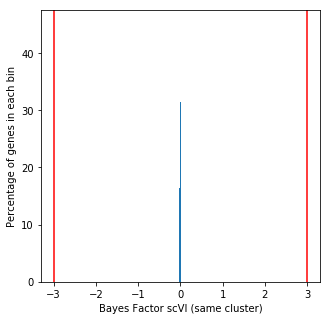

In [30]:
cell_a_idx = np.random.choice(np.where((pbmc_dataset.labels==2).ravel())[0], 100)
cell_b_idx = np.random.choice(np.where((pbmc_dataset.labels==2).ravel())[0], 100)
pbmc_trainer.selected_posterior_CD = pbmc_trainer.create_posterior(indices=np.concatenate((cell_a_idx, cell_b_idx)))
st = pbmc_trainer.selected_posterior_CD.differential_expression_score(2,2,M_sampling=200, M_permutation=40000)

plt.figure(figsize=(5, 5))
plt.hist(st, density=True)
plt.axvline(x=3, c="r")
plt.axvline(x=-3, c="r")
plt.xlabel("Bayes Factor scVI (same cluster)")
plt.ylabel("Percentage of genes in each bin")

### Figure 13. DE; plots

#### a) Originally found for PBMC dataset, but let's do it for Brain Small

This result was only obtained on the PBMC dataset

In [18]:
import scipy

def process_proba(logit_dropout, mean=None, dispersion=None):
    p = 1 / (1 + np.exp(- logit_dropout))
    if mean is not None:
        p = (1 - p) / scipy.special.gamma(dispersion) * np.power(dispersion / (dispersion + mean), dispersion)

    p[p > 1] = np.max(p[p < 1])
    p[p == 0] = np.min(p[p > 0])

    return p

In [77]:
dropout_list, mean_list, dispersion_list = pbmc_trainer.train_set.generate_parameters()

Text(0,0.5,'Percentage of matrix entries in that bin')

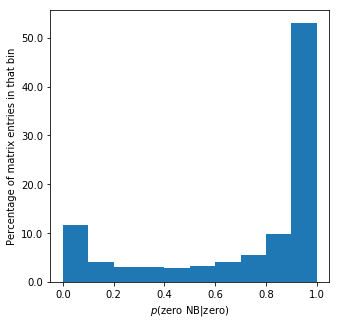

In [78]:
# PBMC
plt.figure(figsize=(5, 5))
from matplotlib.ticker import FuncFormatter


def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(10 * y)
    return s


p_nb = process_proba(dropout_list, mean_list, dispersion_list)
p_zi = process_proba(dropout_list)

ratio_prob = p_nb / (p_nb + p_zi - p_nb * p_zi)

plt.hist(ratio_prob.flatten(), bins=10, density=True)
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel(r"$p($zero NB$ | $zero$)$")
plt.ylabel("Percentage of matrix entries in that bin")

#### b) c) d) BRAIN_SMALL

In [16]:
brain_small_dataset = BrainSmallDataset()
brain_small_dataset.subsample_genes(3000)
brain_small_dataset.dense=True
brain_small_dataset.X = np.ascontiguousarray(brain_small_dataset.X.A, dtype=np.float32)

vae = VAE(brain_small_dataset.nb_genes)
trainer = UnsupervisedTrainer(vae, brain_small_dataset)
trainer.train(200)
dropout_list, mean_list, dispersion_list = trainer.train_set.generate_parameters()

File data/10X/neuron_9k/filtered_gene_bc_matrices.tar.gz already downloaded
Preprocessing dataset
Finished preprocessing dataset
File data/neuron_9k/brain_small_metadata.pickle already downloaded
Downsampling from 27998 to 3000 genes
training: 100%|██████████| 200/200 [01:52<00:00,  1.78it/s]


In [19]:
p_nb = process_proba(dropout_list, mean_list, dispersion_list)
p_zi = process_proba(dropout_list)

ratio_prob = p_nb / (p_nb + p_zi - p_nb * p_zi)

Text(0,0.5,'Proportion of zero entries in each cell')

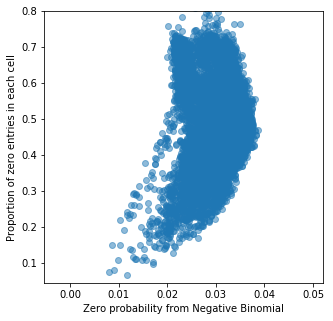

In [20]:
plt.figure(figsize=(5, 5))
plt.scatter(np.mean(p_nb, axis=1),np.mean(brain_small_dataset.X[trainer.train_set.indices]==0, axis=1), alpha=0.5)
plt.ylim((0.045, 0.8))
plt.xlabel("Zero probability from Negative Binomial")
plt.ylabel("Proportion of zero entries in each cell")

Text(0,0.5,'Genome not gene QC in each cell')

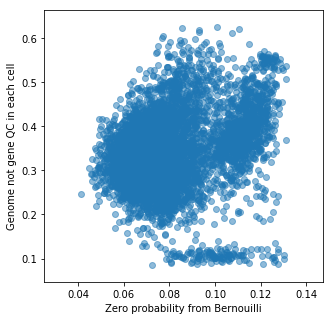

In [21]:
plt.figure(figsize=(5, 5))
plt.scatter(np.mean(p_zi, axis=1), brain_small_dataset.raw_qc[trainer.train_set.indices, 5], alpha=0.5)
#plt.ylim((0.045, 0.27))
plt.xlabel("Zero probability from Bernouilli")
plt.ylabel("Genome not gene QC in each cell")

Text(0,0.5,'Mapped reads QC in each cell')

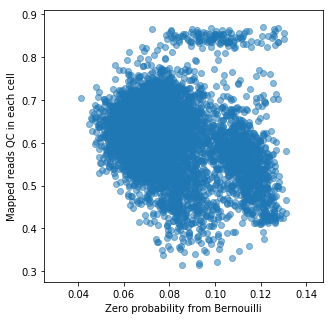

In [22]:
plt.figure(figsize=(5, 5))
plt.scatter(np.mean(p_zi, axis=1), brain_small_dataset.raw_qc[trainer.train_set.indices, 4], alpha=0.5)
#plt.ylim((0.045, 0.27))
plt.xlabel("Zero probability from Bernouilli")
plt.ylabel("Mapped reads QC in each cell")

### Figure 14. imputation 

#### a) b) c) Brain Large

In [9]:
import h5py
data_path = "/home/ubuntu/data_small.hdf5"
f = h5py.File(data_path)
expression_train = f["data_train"][:10000]
expression_test = f["data_test"][:10000]
data_path = "/home/ubuntu/"
X_zero, i, j, ix = \
        np.load(data_path + "imputation/X_zero.npy"), np.load(data_path + "imputation/i.npy"),\
        np.load(data_path + "imputation/j.npy"), np.load(data_path + "imputation/ix.npy")

In [5]:
# BRAIN_LARGE, CORTEX

brain_large_dataset = BrainLargeDataset() # Subsampled to 720 genes
gene_dataset = brainlarge_dataset
gene_dataset.dense=True
gene_dataset.X = brainlarge_dataset.X.A

In [16]:
batch_size = 128
learning_rate = 0.005
epsilon = 0.01

range_d = [2, 5, 7, 10, 12, 15, 20, 30]
results = {}

n_trials = 4

for d in range_d:
    results[d] = []
    for _ in range(n_trials):
        vae = VAE(gene_dataset.nb_genes, n_batch=gene_dataset.n_batches * use_batches, n_latent=d)
        trainer = UnsupervisedTrainer(vae,
                                      gene_dataset,
                                      train_size=10000,
                                      use_cuda=use_cuda)

        trainer.corrupt_posteriors(rate=0.1, corruption="uniform")
        trainer.train(120)
        trainer.uncorrupt_posteriors()
        
        results[d].append(trainer.train_set.imputation_score())

training: 100%|██████████| 120/120 [02:28<00:00,  1.24s/it]


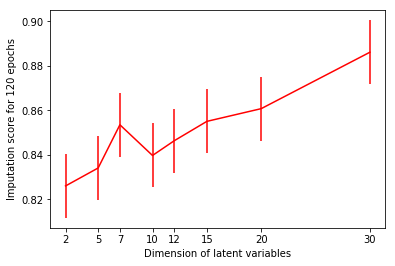

In [18]:
import numpy as np
import matplotlib.pyplot as plt

N = 8
means = np.mean(np.array(list(results.values())), axis=1)
std = np.std(np.array(list(results.values())), axis=1)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.errorbar(results.keys(), means, color='r', yerr=std[0])

# add some text for labels, title and axes ticks
ax.set_ylabel('Imputation score for 120 epochs')
ax.set_xticks(list(results.keys()))
ax.set_xlabel("Dimension of latent variables")
plt.show()

In [ ]:
gene_dataset = brain_large

# gene_dataset.dense=True
# gene_dataset.X = brainlarge_dataset.X.A

vae = VAE(gene_dataset.nb_genes)

trainer_brain_large = UnsupervisedTrainer(vae, gene_dataset, frequency=1)

trainer_brain_large.train_set = trainer_brain_large.create_posterior(indices=np.arange(10000))
trainer_brain_large.test_set = trainer_brain_large.create_posterior(indices=np.arange(10000,20000))
trainer_brain_large.train_set.to_monitor = ['imputation_score', 'll']
trainer_brain_large.test_set.to_monitor = ['ll']


trainer_brain_large.corrupt_posteriors(rate=0.2, corruption="binomial")
# gene_dataset.corrupted_X = np.ascontiguousarray(gene_dataset.corrupted_X.A, dtype=np.float32)

trainer_brain_large.train(120)
trainer_brain_large.uncorrupt_posteriors()

training:  18%|█▊        | 21/120 [04:00<18:54, 11.46s/it]

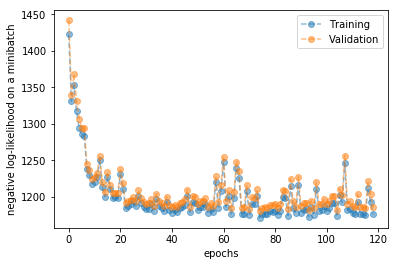

In [19]:
plt.plot(trainer_brain_large.history["ll_train_set"][2:],  marker='o', linestyle='--',label="Training", alpha=0.5)
plt.plot(trainer_brain_large.history["ll_test_set"][2:],  marker='o', linestyle='--',label="Validation", alpha=0.5)
plt.legend()
plt.ylabel("negative log-likelihood on a minibatch")
plt.xlabel("epochs")
plt.show()

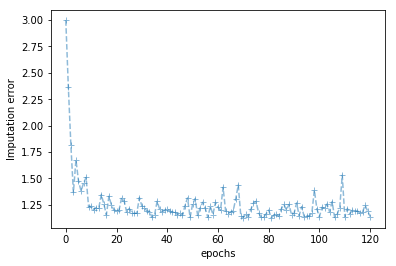

In [20]:
history_impute = trainer_brain_large.history['imputation_score_train_set']

plt.plot(history_impute,  marker='+', linestyle="--", alpha=0.5)
plt.ylabel("Imputation error")
plt.xlabel("epochs")
plt.show()

In [21]:
print(history_impute[-1])

1.1360584


#### d )

In [ ]:
res = np.zeros((5, 6, 3))
latent_d = [2, 5, 7, 10, 15, 20]
n_epochs= 250
epsilon=0.01
for j, d in enumerate(latent_d):
    for t in range(5):
        cortex_vae = VAE(cortex_dataset.nb_genes, n_batch=cortex_dataset.n_batches * use_batches, n_latent=d)
        trainer_cortex = UnsupervisedTrainer(cortex_vae,
                                         cortex_dataset,
                                         train_size=0.75,
                                         use_cuda=use_cuda)
        trainer_cortex.train(n_epochs=n_epochs, lr=lr, eps=epsilon)
        
        asw_score, nmi_score, ari_score, uca_score = trainer_cortex.train_set.clustering_scores(verbose=False)
        res[t,j] = asw_score, ari_score, nmi_score

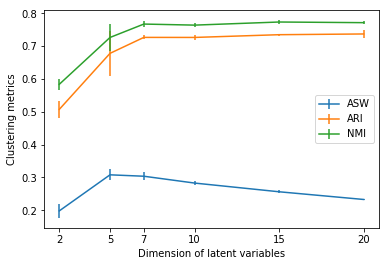

In [19]:
import numpy as np
import matplotlib.pyplot as plt

N = 8

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

label = ["ASW", "ARI", "NMI"]

fig, ax = plt.subplots()
for i in [0, 1, 2]:
    ax.errorbar(latent_d, np.mean(res[:, :, i], axis=0), yerr=np.std(res[:, :, i], axis=0), label=label[i])

# add some text for labels, title and axes ticks
ax.set_ylabel('Clustering metrics')
ax.set_xticks(latent_d)
ax.set_xlabel("Dimension of latent variables")
plt.legend()

plt.savefig("zeiler_clustering_dimension_stability.pdf", dpi=300)

plt.show()

### Figure 15. clustering

For the random data, we obtain the labels that order the cell-cell similarity matrices by a k means clustering on SIMLR latent space.

#### a) scVI latent space with SIMLR labels. There is no structure

mu 4.0 theta 2.0 r 2.0 p 0.6666666666666666 dropout 0.7
File data/random_metadata.pickle already downloaded
training: 100%|██████████| 120/120 [00:15<00:00,  7.98it/s]


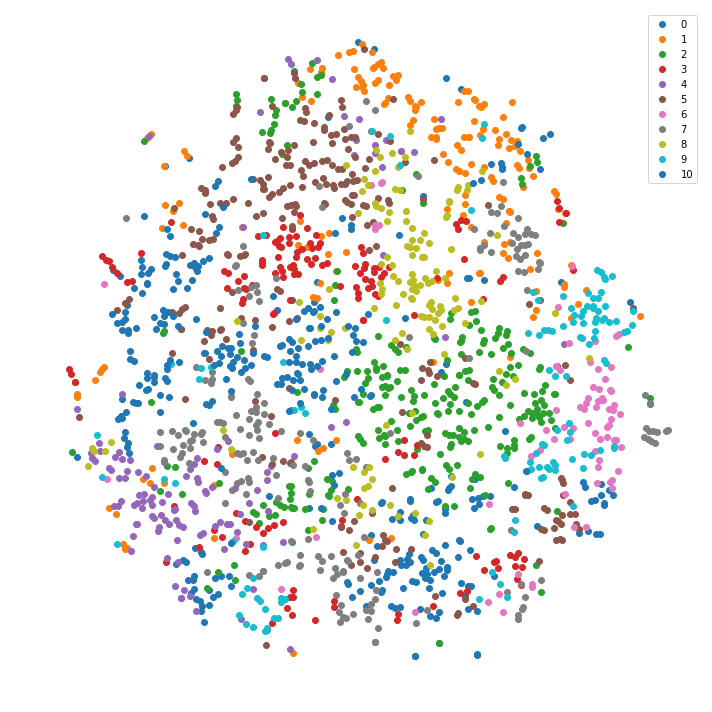

In [23]:
# random and HEMATO

synthetic_dataset = SyntheticRandomDataset()
vae = VAE(synthetic_dataset.nb_genes)
trainer_synthetic = UnsupervisedTrainer(vae, synthetic_dataset, train_size=1.0)
trainer_synthetic.train(120)

trainer_synthetic.train_set.show_t_sne(n_samples=None, color_by='labels')

#### b) SIMLR latent space with SIMLR labels

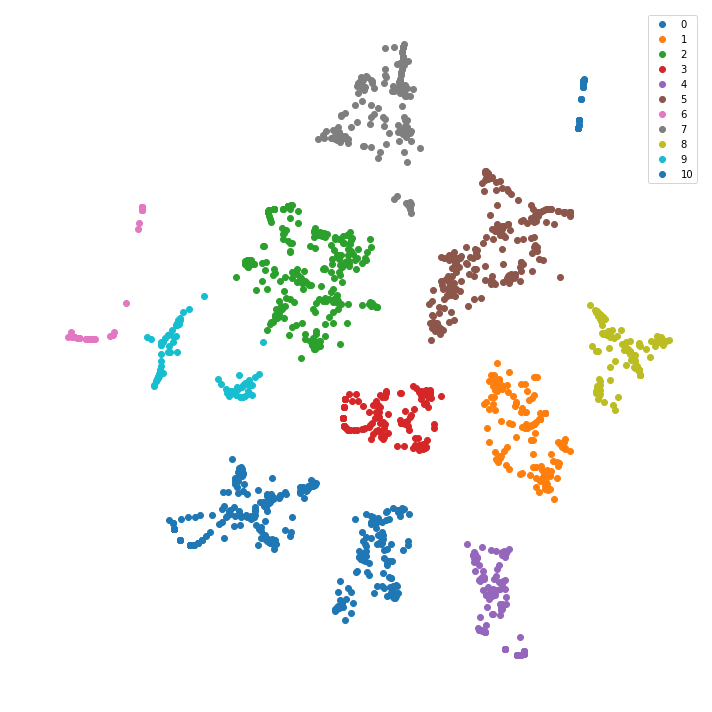

In [7]:
trainer_synthetic.train_set.show_t_sne(latent=synthetic_dataset.simlr_metadata['ydata'], 
                                       labels=synthetic_dataset.labels.ravel(), color_by='labels')

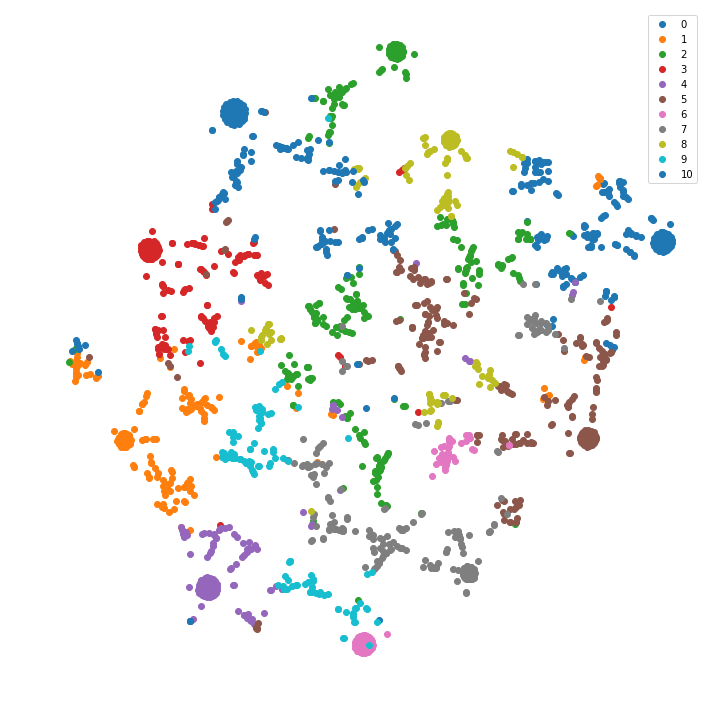

In [13]:
from sklearn.decomposition import PCA
n_latent=10
pca = PCA(n_components=n_latent)
X = pca.fit_transform(np.log(1 + synthetic_dataset.X / np.sum(synthetic_dataset.X, axis=1)[:, np.newaxis]))
latent_pca, _ = trainer_synthetic.train_set.apply_t_sne(X, n_samples=None)
trainer_synthetic.train_set.show_t_sne(latent=latent_pca, 
                                       labels=synthetic_dataset.labels.ravel(), color_by='labels')

### Figure 16. tsne

In [20]:
# HEMATO 
hemato_dataset = HematoDataset()

File data/HEMATO/bBM.raw_umifm_counts.csv.gz already downloaded
File data/HEMATO/data.zip already downloaded
Preprocessing Hemato data
Finished preprocessing Hemato data


In [23]:
# set hyperparameters 
n_epochs=200
lr=0.0004
use_batches=False
use_cuda=True

n_latent = 60
# train the model 
hemato_vae = VAE(hemato_dataset.nb_genes, n_batch=hemato_dataset.n_batches * use_batches, n_latent=n_latent)
hemato_trainer = UnsupervisedTrainer(hemato_vae,
                                    hemato_dataset,
                                    train_size=0.9, 
                                    use_cuda=use_cuda, 
                                    frequency=0)


hemato_trainer.train(n_epochs=n_epochs, lr=lr)
# visualize latent space 
hemato_trainer.full_dataset = hemato_trainer.create_posterior(shuffle=False)
latent_hemato, _ = hemato_trainer.full_dataset.apply_t_sne(hemato_trainer.full_dataset.get_latent()[0],n_samples = None)

training: 100%|██████████| 200/200 [01:39<00:00,  2.01it/s]


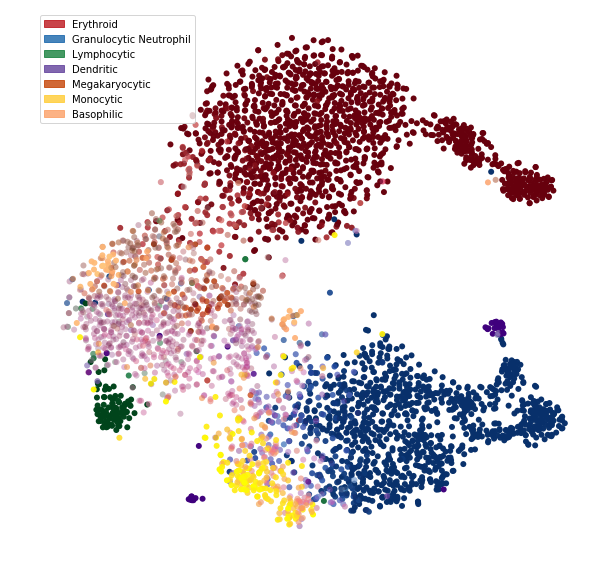

In [24]:
meta = hemato_dataset.meta
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def alpha_cmap(cmap, min_alpha=-1, max_alpha=1):
    cm = plt.get_cmap(cmap)
    cm._init()
    alphas = np.abs(np.linspace(0.0, 1.0, cm._lut[:,-1].shape[0]))
    cm._lut[:,-1] = alphas
    return cm

def plot_layout(layout=None):
    plt.figure(figsize=(10, 10))
    patches = [] 
    for i, (color, cell_type) in enumerate(zip(
        ["Reds", "Blues","Greens","Purples","Oranges","spring",'copper'],
        ['Erythroid', 'Granulocytic Neutrophil', 'Lymphocytic', 'Dendritic', 'Megakaryocytic','Monocytic', 
         'Basophilic'])):
        patches+=[mpatches.Patch(color=plt.get_cmap(color)(.8), label=cell_type)]
        plt.scatter(layout[:, 0], layout[:, 1], c=meta.iloc[:, i+1],cmap=alpha_cmap(color), label=cell_type, 
                    edgecolors='none')
    plt.legend(handles=patches)
    plt.axis("off")

plot_layout(latent_hemato)